# 1. Loading the data

In [1]:
# Loading a library for datasets
import pandas as pd

DATASET = 'WBI'
N_sets = 6
# DATASET = 'RIMPVC'
# N_sets = 5

def traces(i):
    """Get traces of dataset @i"""
    return pd.read_csv('data/WBI%s.csv' % i, index_col=0)

def derivs(i):
    '''Get derivatives of dataset @i'''
    return pd.read_csv('data/dWBI%s.csv' % i, index_col=0)

# Some code for later
from sklearn.preprocessing import MinMaxScaler 
minmax = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
meanstd = StandardScaler()

In [2]:
t0 = traces(0)
print(t0.shape)
print(t0.head(10))

(3312, 154)
                 1        10       100       101       103       104  \
0.000000  0.393794  0.033344  0.230303  0.093342  0.105601  0.090190   
0.326087  0.431958  0.043458  0.256019  0.064103  0.087317  0.085519   
0.652174  0.475861  0.021436  0.199998  0.038105  0.095465  0.099215   
0.978261  0.469389  0.022726  0.235288  0.035981  0.116716  0.112524   
1.304348  0.515858  0.000000  0.241552  0.040661  0.096101  0.078702   
1.630435  0.462483  0.043024  0.250960  0.011033  0.122827  0.092850   
1.956522  0.480114  0.039882  0.240859  0.024020  0.105904  0.097351   
2.282609  0.449676  0.076837  0.247428  0.006406  0.119946  0.130496   
2.608696  0.472390  0.034128  0.242713  0.029846  0.090938  0.091470   
2.934783  0.523576  0.050247  0.235491  0.008998  0.120672  0.092136   

               105       107        11       112  ...     SMDDR     SMDVL  \
0.000000  0.202689  0.140624  0.031874  0.037385  ...  0.210548  0.324142   
0.326087  0.213360  0.091380  0.040606  0

# 2. Data Visualization

## Traces on single dataset

In [3]:
import pylab as plt
import numpy as np

#Define the function for plotting traces
def plot_all_traces(df, scaler=None):
    '''Plot all traces of dataset @df after scaling with method @scaler'''
    plt.figure(figsize=(20,30))
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    traces = df.values.copy()
    stretch = 2
    N = traces.shape[1]//2
    for i in range(traces.shape[1]):
        traces[:,i] += stretch * (i - N * (i > N-1))
    t1 = traces[:,:N]
    t2 = traces[:,N:]
    plt.subplot(121)
    plt.plot(t1, linewidth=1)
    plt.yticks(np.arange(0,N*stretch,stretch),labels=df.columns[:N])
    plt.subplot(122)
    plt.plot(t2, linewidth=1)
    plt.yticks(np.arange(0,N*stretch,stretch),labels=df.columns[N:])
    plt.show()
    plt.close()

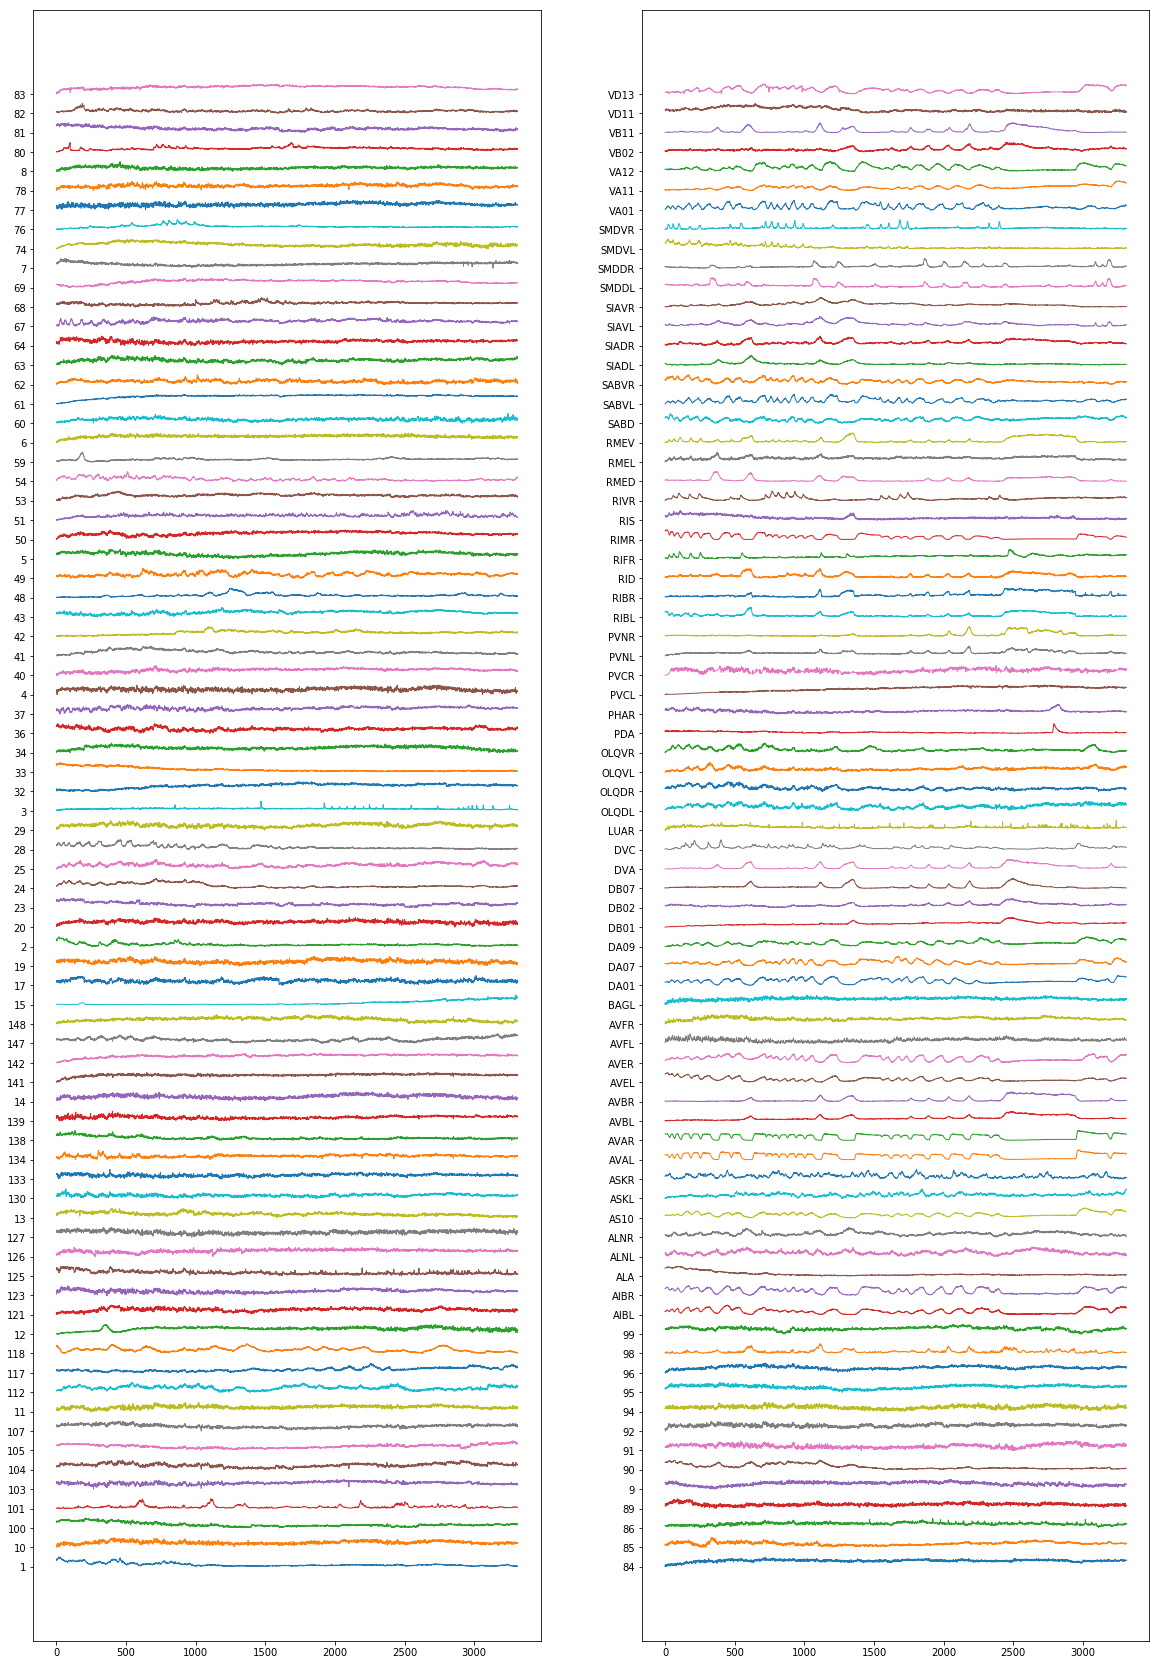

In [4]:
# Call the function for 1 dataset 
# plot_all_traces(t0)
plot_all_traces(t0, scaler=minmax)

## Heatmap on single dataset

In [5]:
import seaborn as sns

# Some colormaps
COLOR_MAPS = ['seismic', 'jet', 'Reds', 'flag']

#Define the function for plotting as a heatmap
def heatmap(df, scaler=None, cmap='flag'):
    '''
    Plot traces of df as a heatmap, 
    using @scaler for scaling 
    and @cmap for colors
    '''
    plt.figure(figsize=(20,30))
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    sns.heatmap(df.T, cmap=cmap, cbar_kws={"shrink": .5})
    plt.show()
    plt.close()

Run the code below and look at the result.  
The heatmap is obviously pretty unreadable, why ?  
Why not looking at this https://matplotlib.org/users/colormaps.html ?

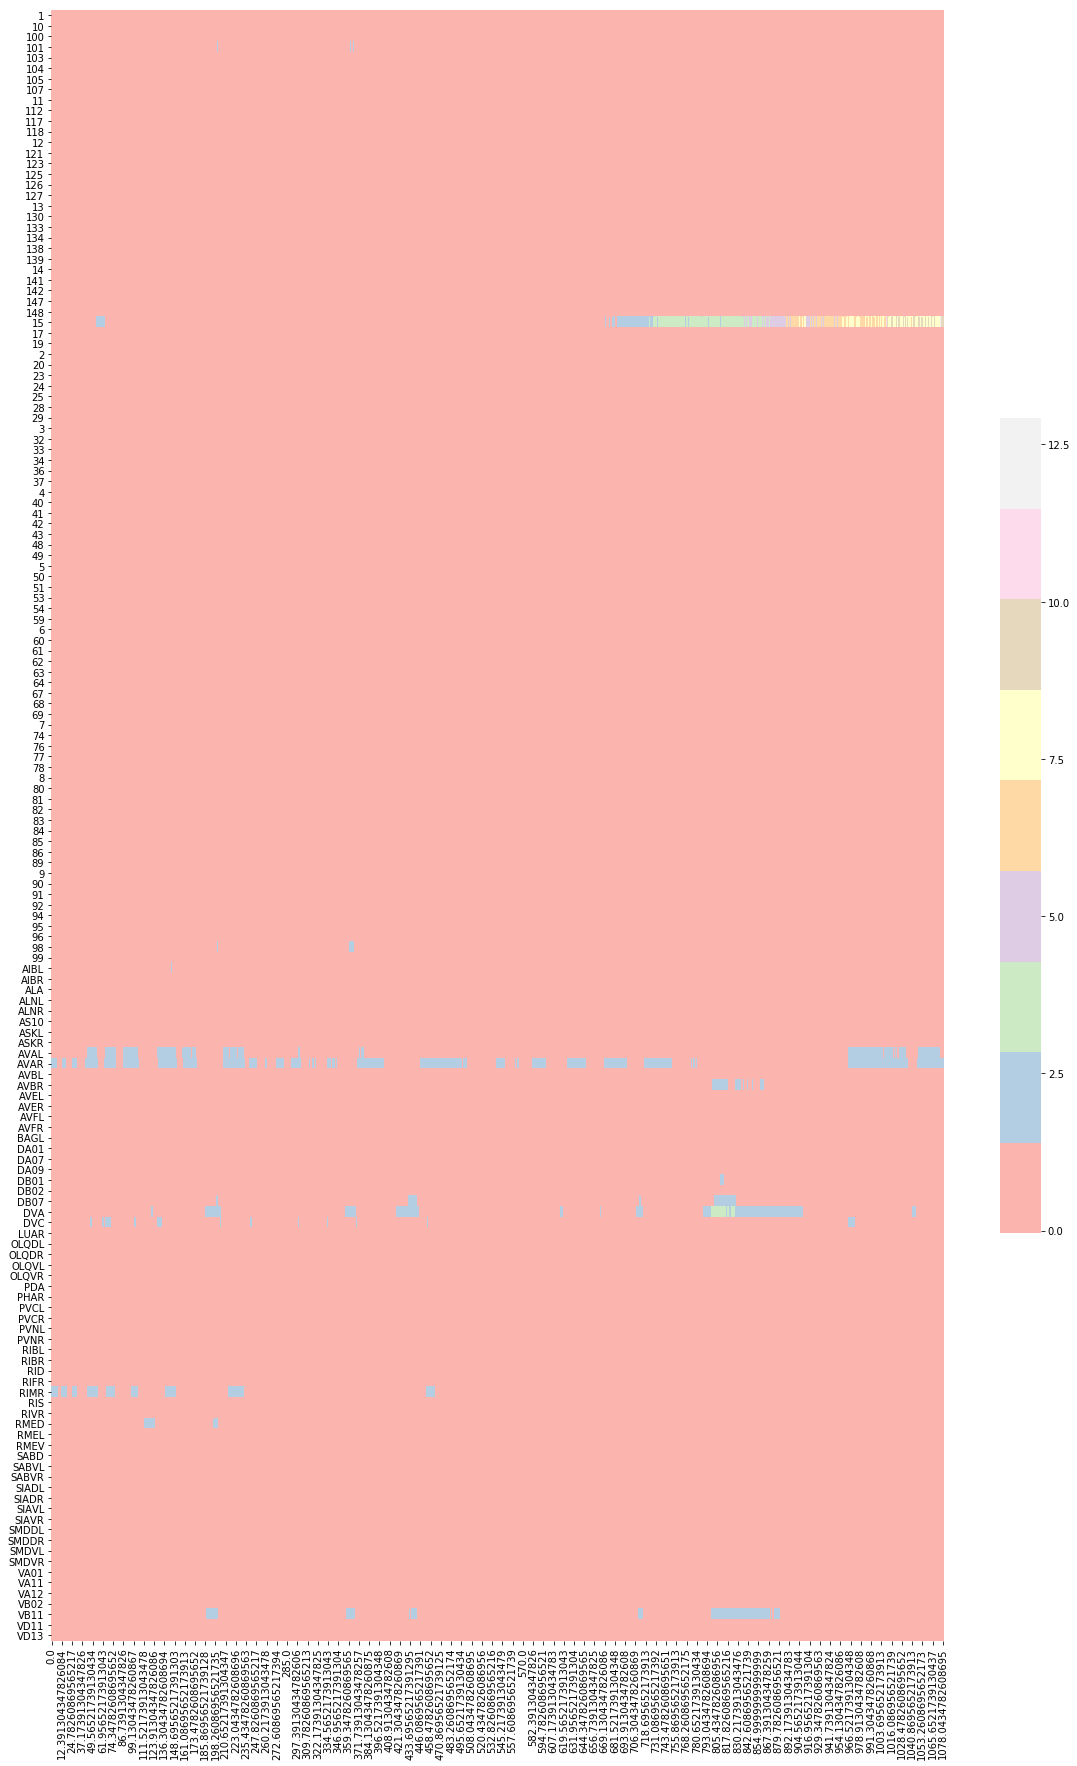

In [6]:
#Call the function for 1 dataset
heatmap(t0, cmap='Pastel1', scaler=None)

In [7]:
import joypy 

labs0 = [n for n in t0.columns if any(c.isalpha() for c in n)]


## Visualization of different scaling strategies

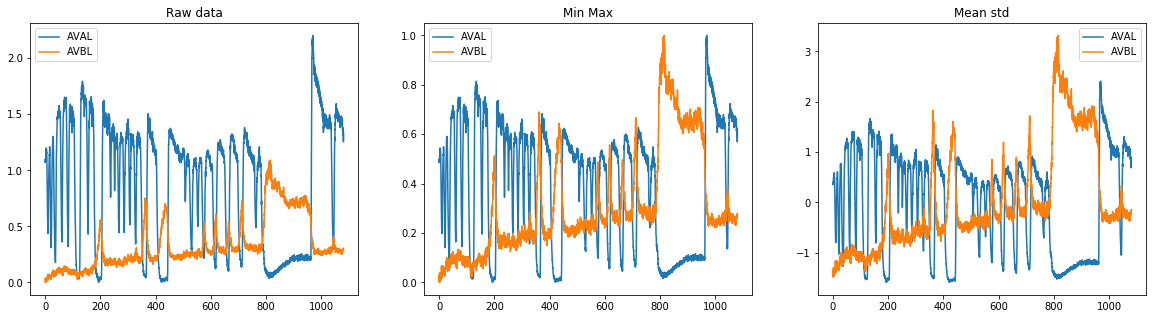

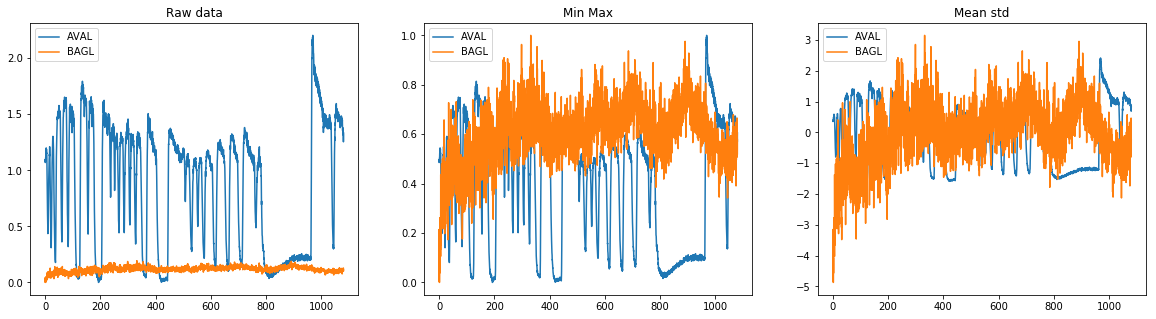

In [8]:
NS = ['AVAL', 'AVBL']

def compare_norm(neurons=NS):
    """Compare the influence of different normalization methods on @neurons"""
    def plot_avab(df=t0, scaler=None):
        if scaler is not None:
            df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
        for n in neurons:
            plt.plot(df[n], label=n)
        plt.legend()
        
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('Raw data')
    plot_avab()
    plt.subplot(132)
    plt.title('Min Max')
    plot_avab(scaler=minmax)
    plt.subplot(133)
    plt.title('Mean std')
    plot_avab(scaler=meanstd)
    plt.show()
    
compare_norm()
compare_norm(['AVAL', 'BAGL'])

## Visualization of all datasets

In [9]:
all_names = set()
for i in range(N_sets):
    all_names = all_names.union(set(traces(i).columns))
LABELLED = [n  for n in all_names if any(c.isalpha() for c in n)]
LABELLED = sorted(LABELLED)
LABELLED.remove('bullshit')
LABELLED.remove('bullshit.1')

In [10]:
def comp_amp(func, neur=LABELLED, stretch=1.7, scaler=None, title=''):
    '''
    Plot traces of neurons @neur 
    from data given by @func accross datasets
    @stretch defines the separation between traces
    @scaler defines the scaling for transforming the data
    @title will be the title of the figure
    '''
    t = 0
    N = len(neur)
    cmap = plt.cm.get_cmap('tab10')
    plt.figure(figsize=(45,30))
    for i in range(N_sets):
        df = func(i)
        if scaler is not None:
            df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
        for j, n in enumerate(neur):
            try:
                plt.plot(t + df.index, df[n] + j*stretch, color=cmap(j%10))
            except:
                pass
        t += df.index[-1]
        plt.axvline(t, color='k', linestyle='--')
    
    plt.yticks(np.arange(0,N*stretch,stretch),labels=neur)   
    plt.tick_params(labeltop=False, labelright=True)
    plt.title(title, fontsize=20)
    plt.show()

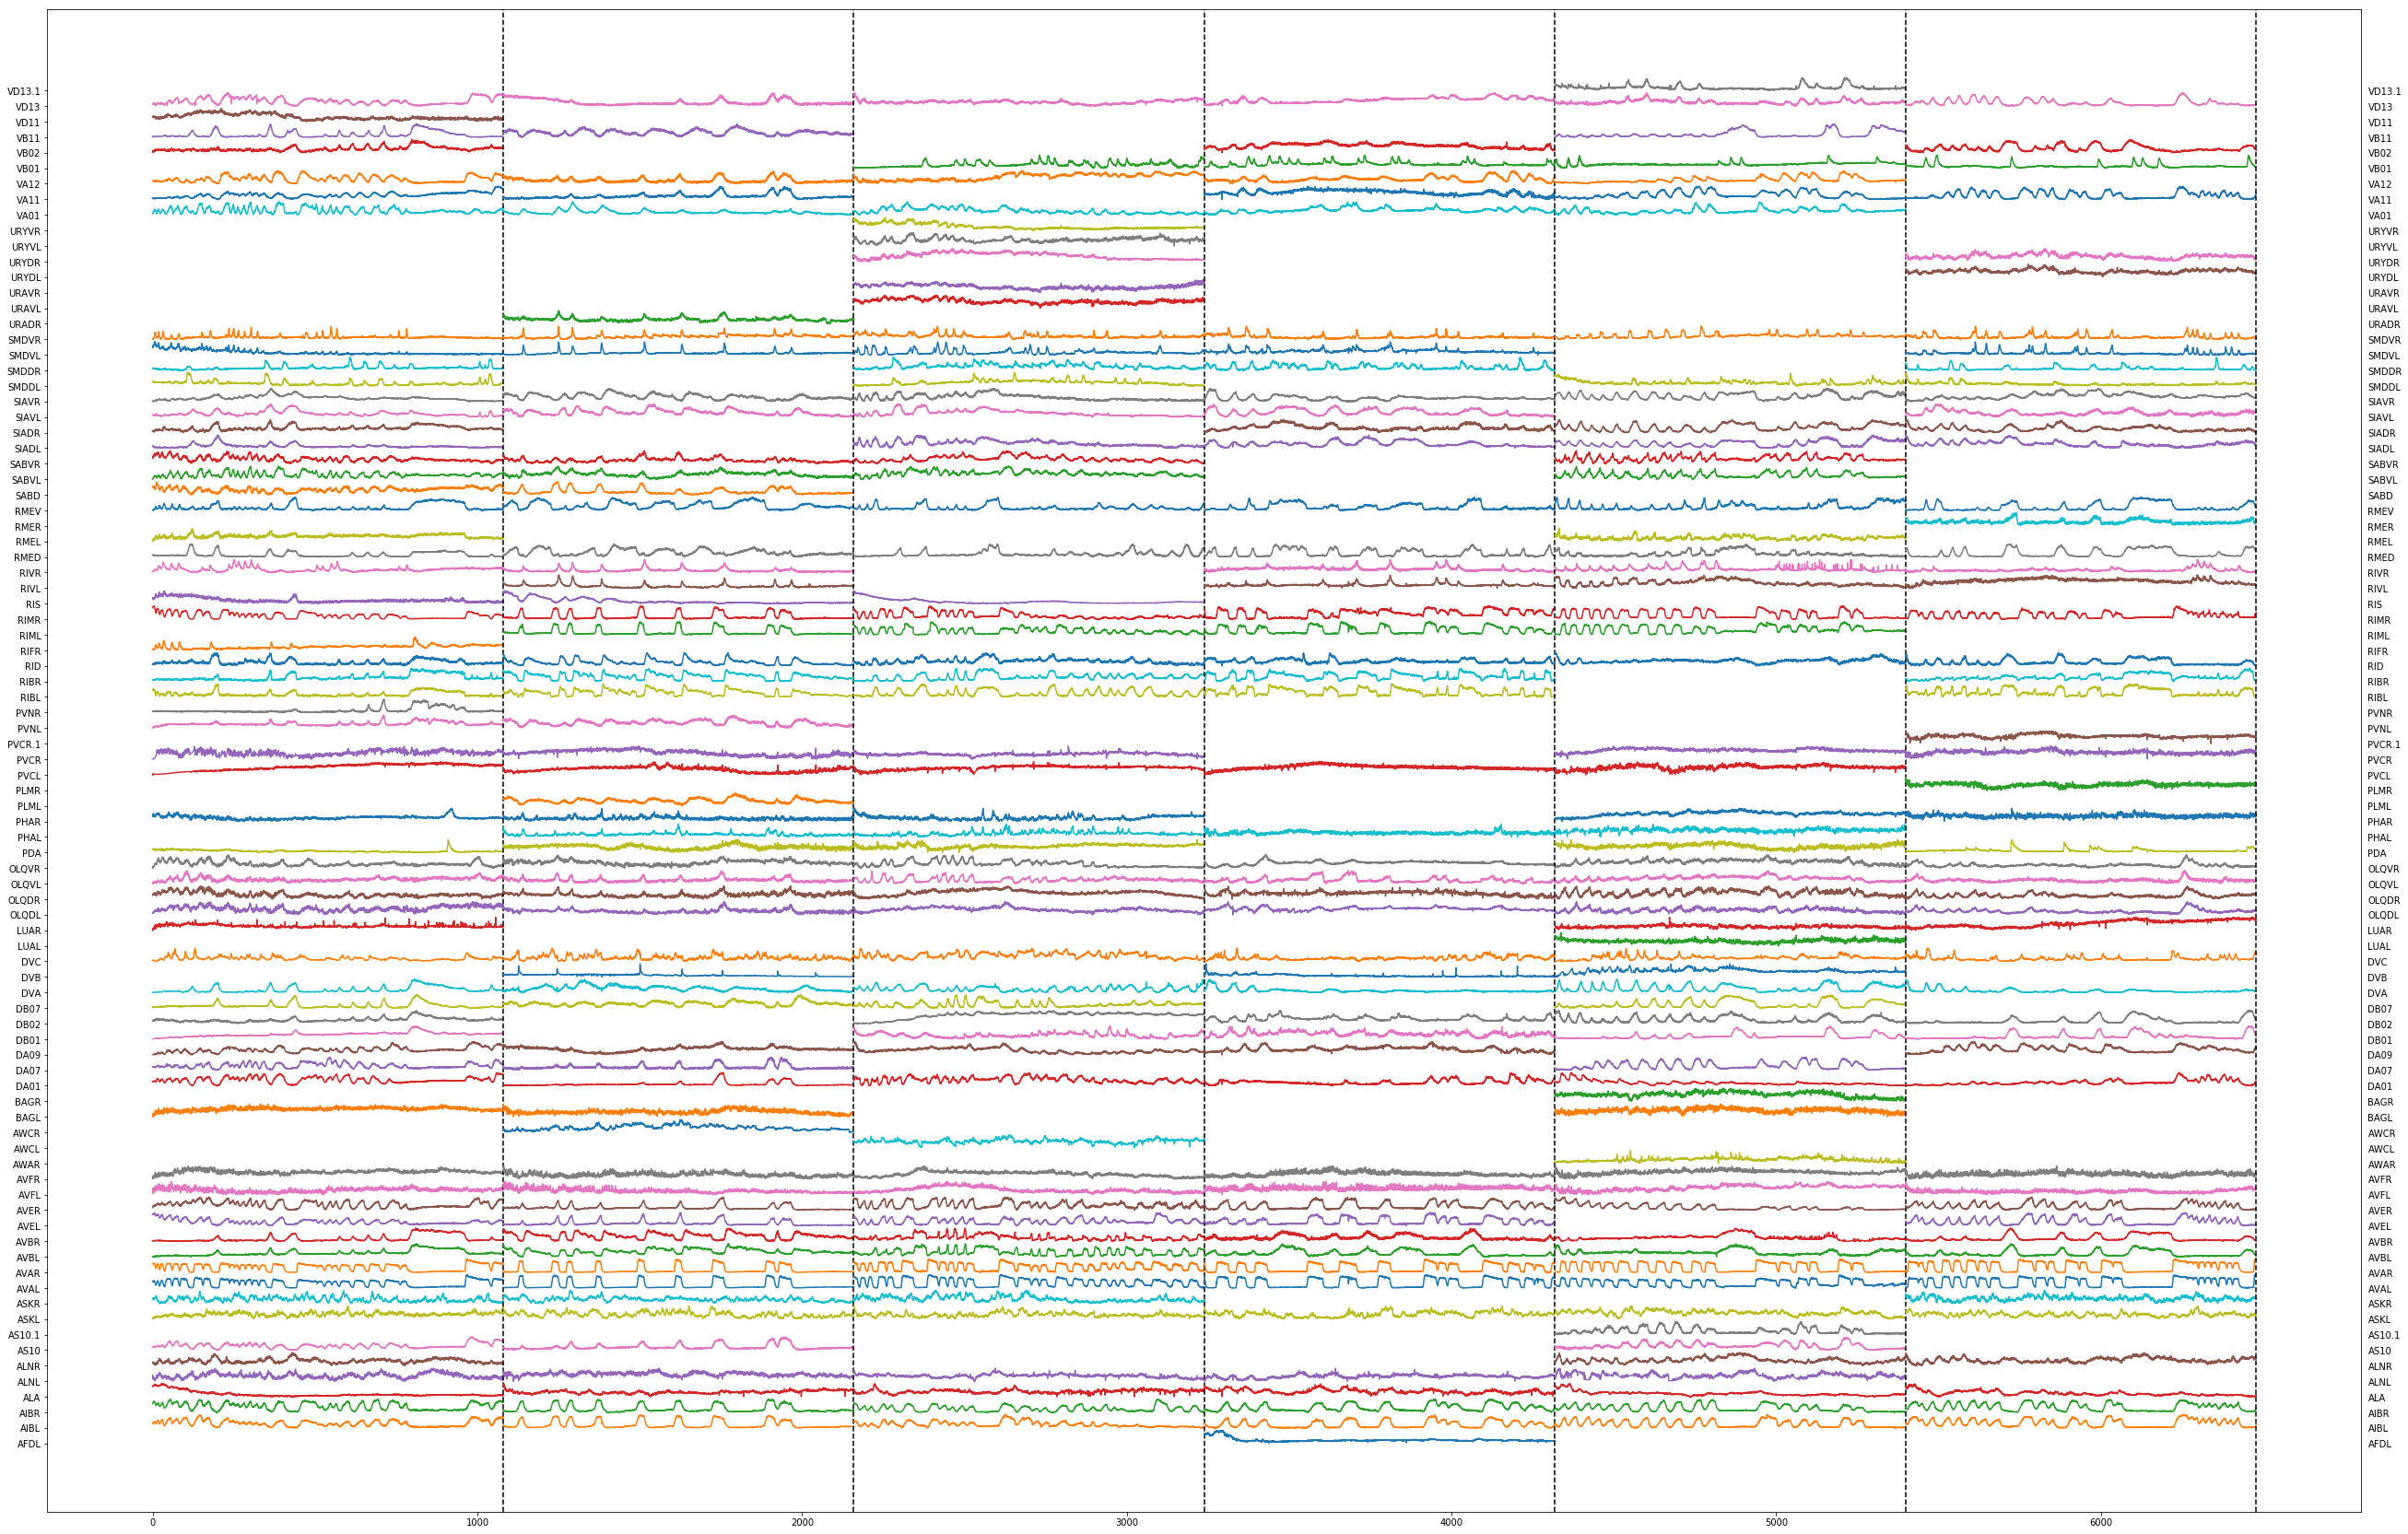

In [11]:
comp_amp(traces, scaler=minmax, stretch=1.2)

## Influence of different scaling strategies over datasets

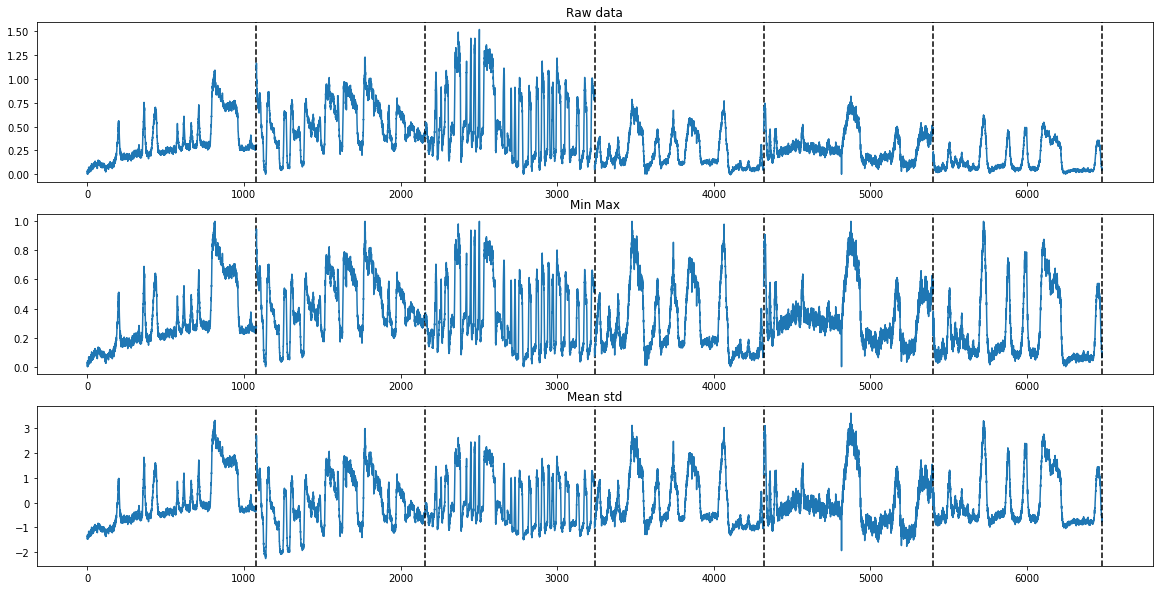

In [12]:
def compare_norm(neurons):
    """Compare the influence of different normalization methods on @neurons accross datasets"""
    def plot_avab(df=t0, scaler=None):
        t = 0
        stretch = 2
        cmap = plt.cm.get_cmap('tab10')
        for i in range(N_sets):
            df = traces(i)
            if scaler is not None:
                df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
            for j, n in enumerate(neurons):
                try:
                    plt.plot(t + df.index, df[n] + j*stretch, color=cmap(j%10))
                except:
                    pass
            t += df.index[-1]
            plt.axvline(t, color='k', linestyle='--')
        
    plt.figure(figsize=(20,10))
    plt.subplot(311)
    plt.title('Raw data')
    plot_avab()
    plt.subplot(312)
    plt.title('Min Max')
    plot_avab(scaler=minmax)
    plt.subplot(313)
    plt.title('Mean std')
    plot_avab(scaler=meanstd)
    plt.show()
    
compare_norm(['AVBL'])

# 3. Analysis

## 1. Correlation and distance

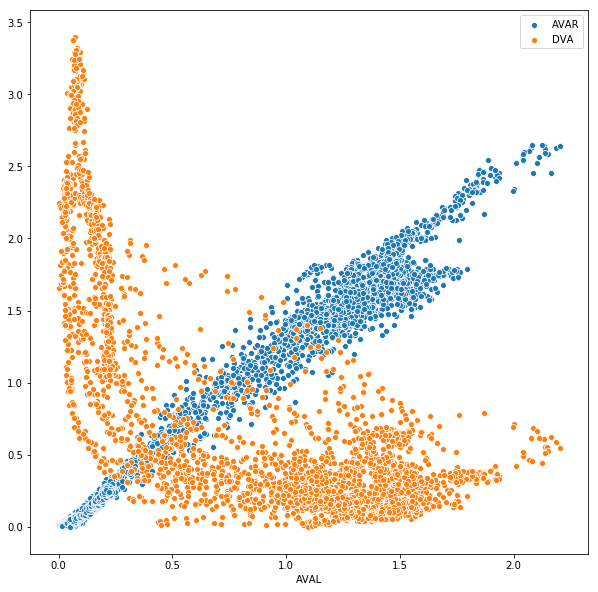

In [13]:
N0 = 'AVAL'
N1 = 'AVAR'
N2 = 'DVA'

plt.figure(figsize=(10,10))
sns.scatterplot(t0[N0], t0[N1], label=N1)
sns.scatterplot(t0[N0], t0[N2], label=N2)
# print('Correlation between %s and %s : %s' % (N0,N1,np.corrcoef(t0[N0], t0[N1])[0,1]))
# print('Correlation between %s and %s : %s' % (N0,N2,np.corrcoef(t0[N0], t0[N2])[0,1]))
plt.ylabel("")
plt.show()

# plt.figure(figsize=(15,5))
# plt.plot(t0[N0], label=N0)
# plt.plot(t0[N1], label=N1)
# plt.legend()
# plt.show()

Correlation & distance matrices

In [14]:
from scipy.spatial.distance import pdist, squareform

def get_labelled(df):
    '''Return the name of labelled neurons in dataset @df'''
    return [n  for n in df.columns if any(c.isalpha() for c in n)]

def corr(df, vmin=None, vmax=None, cmap='flag'):
    '''
    Compute and plot correlation matrix on @df
    with @cmap as colormap
    @vmin defines the extreme lower value on the colormap
    @vmax the maximum
    '''
    corr = df.corr()
    heat(corr, vmin, vmax, cmap)

def dist_comp(df):
    distances = pdist(df.T.values, metric='euclidean')
    return squareform(distances)
def dist(df, scaler=None, vmin=None, vmax=None, cmap='flag'):
    '''Compute and plot distance matrix on @df'''
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    dist = pd.DataFrame(dist_comp(df), columns = df.columns, index=df.columns)
    heat(dist, vmin, vmax, cmap)
    
def heat(df, vmin=None, vmax=None, cmap='flag', size=(10,10)):
    plt.figure(figsize=size)
    sns.heatmap(df, cmap=cmap, square=False, vmax=vmax, vmin=vmin, cbar_kws={"shrink": .5})
    

Run the code below and make it beautiful  
Do you see a difference between the 2 matrices ?  

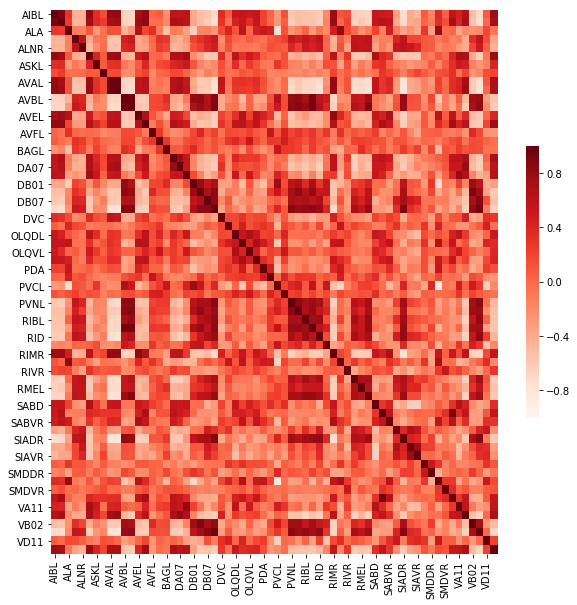

In [15]:
#Plot some matrices
names = get_labelled(t0)
corr(t0[names], vmin=-1, vmax=1, cmap='Reds')
plt.show()
# dist(t0[names].T, scaler=minmax, cmap='seismic')
# plt.show()
# dist(t0[names].T, scaler=meanstd, cmap='seismic')
# plt.show()

## 2. PCA

In [16]:
from sklearn.decomposition import PCA
from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
df = t0[names]

@interact(df=fixed(t0[names]), scaler=[None, minmax, meanstd], cmap=COLOR_MAPS, d3=True, plot=True)
def pca(df, scaler=None, cmap='flag', d3=False, plot=True):
    '''Perform pca on @df'''
    if d3:
        %matplotlib notebook
    n = 10
    if scaler is not None:
        df2 = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    else:
        df2 = df
    pca = PCA(n_components=n, whiten=True)
    pca.fit(df2)
    columns = ['pca_%i' % i for i in range(n)]
    df_pca = pd.DataFrame(pca.transform(df), columns=columns, index=df.index)
    if plot:
        if d3:
            fig, ax = plt.subplots(figsize=(10, 10))
            ax = fig.gca(projection='3d')
            norm = matplotlib.colors.Normalize(0, df_pca.shape[0], clip=True)
            mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
            ax.scatter(df_pca['pca_0'], df_pca['pca_1'], df_pca['pca_2'], c=mapper.to_rgba(range(df_pca.shape[0])))
            plt.axis('off')
        else:
            %matplotlib inline
            fig, ax = plt.subplots(figsize=(10, 10))
            sns.scatterplot(x='pca_0', y='pca_1', data=df_pca, hue=df.index)
        plt.title('PCA transformation')
        plt.show()

        plt.figure(figsize=(10,5))
        sns.barplot(np.arange(n), pca.explained_variance_ratio_)
        plt.title('Amount of variance explained by components')
        plt.xlabel('# component')
        plt.ylabel('Proportion variance explained')
        plt.show()
    
    return pca.components_

interactive(children=(Dropdown(description='scaler', options=(None, MinMaxScaler(copy=True, feature_range=(0, …

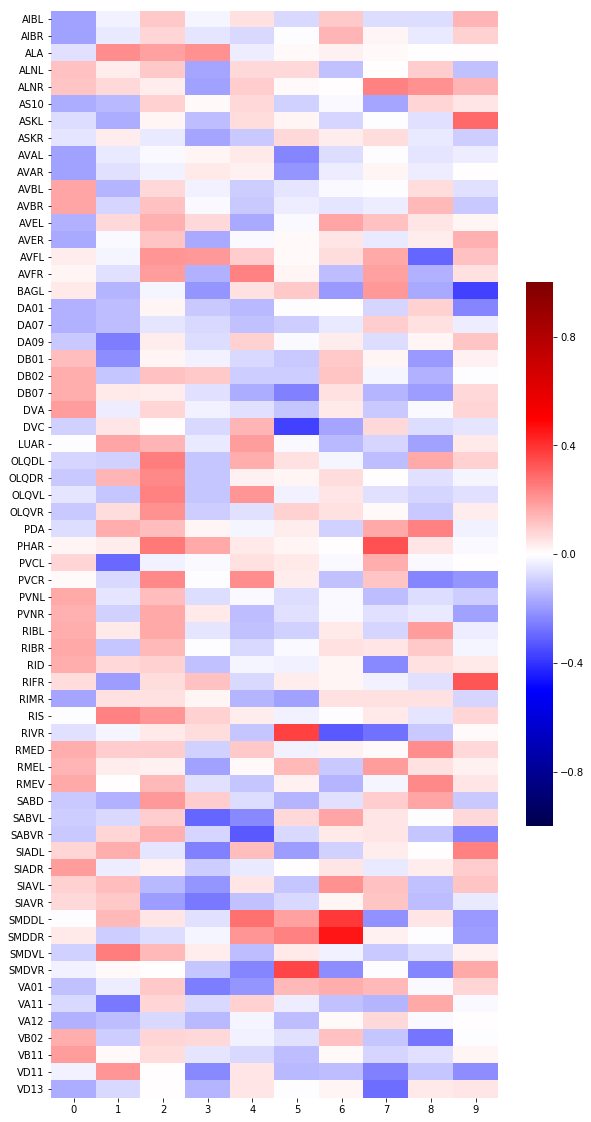

In [17]:
%matplotlib inline
comps = pca(t0[names], scaler=meanstd, plot=False)
dfc = pd.DataFrame(comps.T, index=names)
heat(dfc, cmap='seismic', vmin=-1, vmax=1, size=(10,20))
plt.show()

# plt.plot(t0['VA11'])
# plt.plot(t0['PVCL'])
# plt.show()

In [18]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from ipywidgets import IntSlider

cmap = cm.seismic
norm = Normalize(vmin=-1, vmax=1)

@interact(component=IntSlider(min=0,max=9,step=1,value=0), stretch=2, pca=fixed(comps))
def plot_component(component=0, stretch=2, pca=comps):
    plt.figure(figsize=(15,20))
    for i, n in enumerate(names):
        plt.plot(t0[n] - i*stretch, c=cmap(norm(comps[component,i])))
    res = t0[names].dot(comps[component])
    plt.yticks(np.arange(-(len(names)-1)*stretch, stretch, stretch), labels=names[::-1])
    plt.title('Component %s' % component)
    plt.plot(res + 2.5*stretch, 'g')

interactive(children=(IntSlider(value=0, description='component', max=9), IntSlider(value=2, description='stre…

## 3. Clustering

In [19]:
%matplotlib inline
df = t0[labs0].corr()

@interact(method=['average', 'single', 'complete'], metric=['cityblock', 'euclidean'], ret=False)
def clustmap(method='average', metric='cityblock', ret=True):
    plt.figure(figsize = (15,15))
    cg = sns.clustermap(df, metric=metric, method=method, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True))
    plt.show()
    if ret:
        return cg.dendrogram_col.reordered_ind

interactive(children=(Dropdown(description='method', options=('average', 'single', 'complete'), value='average…

<Figure size 1080x1080 with 0 Axes>

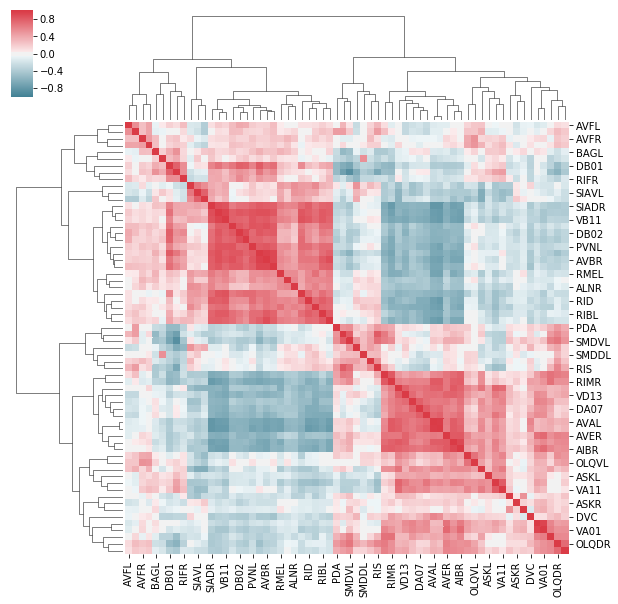

In [20]:
order = df.columns[clustmap()]

Plot the traces and heatmap again using the clustering order

In [21]:
plt.rcParams['axes.facecolor'] = 'black'

from ipywidgets import FloatSlider, interact_manual

### Your code here :
def tshirt(df=t0, neur=labs0, stretch=1.7, slide=10, scaler=None, title='', fill=True, col=True, size=(10,15), sat=0.4, l=1):
    N = len(neur)
    pal = sns.hls_palette(N, h=0.65, s=sat, l=l)
    fig = plt.figure(figsize=size)
    fig.patch.set_facecolor('black')
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    for j, n in enumerate(neur):
        trace = df[n] - j*stretch
#         trace = trace[len(df[n])-j*stretch:]
        x = np.arange(len(trace)) + slide*j
        plt.plot(x, trace, linewidth=1, color=pal[j] if col and not fill else 'white')
        if fill:
            plt.fill_between(x, trace, np.zeros(trace.shape) - j*stretch, color=pal[j])
    
#     sns.despine()
#     plt.yticks(np.arange(0,-N*stretch,-stretch),labels=neur, color='w')  
    
    plt.tick_params(labeltop=False)
    plt.title(title, fontsize=20)
    
    sns.despine()
    plt.xticks([])
    plt.yticks([])
    plt.show()
#     plt.savefig('filledwhite_%.1f_sat%.1f.eps' % (stretch, sat))
    plt.close()

# order = [x for x in order if x not in ['ALA', 'ALNL', 'ALNR', 'ASKL', 'ASKR', 'AVFL', 'AVFR', 'RIS'
#                                            'PVCL', 'PVCR', 'OLQVL', 'OLQVR', 'OLQDL', 'OLQDR']]

@interact_manual(stretch=FloatSlider(min=0.5, max=2., step=0.1, value=1.), slide=IntSlider(min=0, max=20), fill=False, color=True,
          saturation=FloatSlider(min=0.0, max=1., step=0.1, value=0.5), light=FloatSlider(min=0.0, max=1., step=0.1, value=0.5))
def ttt(stretch, slide, fill, color, saturation, light):
    tshirt(t0, labs0, stretch, slide=slide, fill=fill, col=color, sat=saturation, l=light)

interactive(children=(FloatSlider(value=1.0, description='stretch', max=2.0, min=0.5), IntSlider(value=0, desc…

In [22]:
# N = len(order)

# for s in np.arange(0.8, 1.5, 0.1):
#     for sat in np.arange(0, 1.1, 0.1):
#         tshirt(stretch=s, neur=order, sat=sat, l=1-(sat/2))



In [23]:
import bokeh
from bokeh.models.widgets import Slider
from bokeh.io import output_notebook, show
from bokeh.plotting import figure


def tshirt_int(df=t0, neur=order, stretch=1.7):
    df = t0[neur]
    pal = sns.hls_palette(N, h=0.65, s=0.2)
    print(df.shape, shift.shape)

    output_notebook()

    p = figure()
    for j, n in enumerate(neur):
        p.line(df.index, df[n] - j*slider.value, line_color=tuple(255*np.array(pal[j]).astype(np.int32)))

    show(p, slider)
    
tshirt_int()

NameError: name 'N' is not defined